In [40]:
import pandas as pd
import os
from dibs import config
flat_df = pd.read_csv(os.path.join(config.DEFAULT_TRAIN_DATA_DIR, 'flat_df.csv'))
len(flat_df) # was 44745

C:\Users\toddy\anaconda3\envs\B-SOID\lib\site-packages\IPython\core\interactiveshell.py:3417: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


224402

In [41]:
from matplotlib import pyplot as plt


In [42]:
from dibs.pipeline_pieces import NeoHowlandFeatureEngineering
fe = NeoHowlandFeatureEngineering()

In [43]:
eng_feats = fe.all_engineered_features
y_col = 'treatment_group'
roi_col = 'simba_roi'
eng_feats

['distance_ForepawLeft_ForepawRight',
 'distance_ForepawLeft_NoseTip',
 'distance_ForepawRight_NoseTip',
 'distance_ForepawRight_HindpawRight',
 'distance_ForepawLeft_HindpawLeft',
 'distance_ForepawLeft_HindpawRight',
 'distance_ForepawRight_HindpawLeft',
 'distance_HindpawRight_HindpawLeft',
 'distance_NoseTip_TailBase',
 'distance_intermediate_feat_average_ForepawLeft_ForepawRight_NoseTip',
 'distance_intermediate_feat_average_HindpawLeft_HindpawRight_NoseTip',
 'shifted_distance_NoseTip',
 'shifted_distance_ForepawLeft',
 'shifted_distance_ForepawRight',
 'shifted_distance_HindpawLeft',
 'shifted_distance_HindpawRight',
 'shifted_distance_TailBase',
 'convex_hull_area_ForepawLeft_ForepawRight_HindpawRight_NoseTip_HindpawLeft_TailBase',
 'shifted_distance_intermediate_feat_convex_hull_area_ForepawLeft_ForepawRight_HindpawRight_NoseTip_HindpawLeft_TailBase']

In [44]:
df = flat_df[eng_feats + [y_col]]

In [45]:
con_df = df.loc[df[y_col] == 'air_control']
thc_df = df.loc[df[y_col] == 'THC_injected']

distance_ForepawLeft_ForepawRight


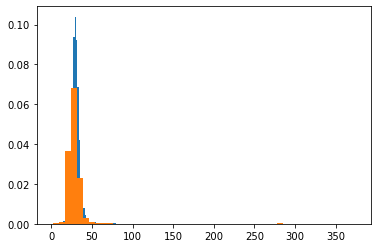

distance_ForepawLeft_NoseTip


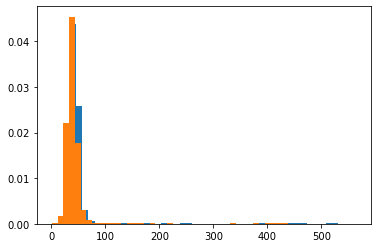

distance_ForepawRight_NoseTip


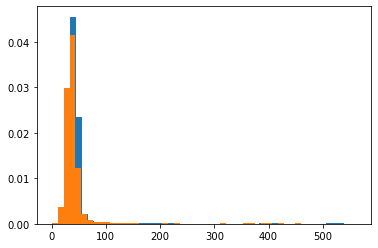

distance_ForepawRight_HindpawRight


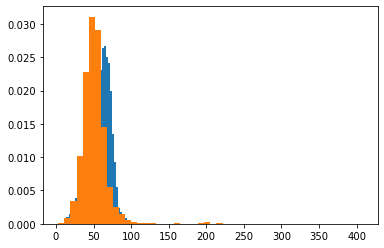

distance_ForepawLeft_HindpawLeft


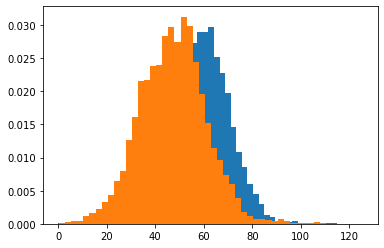

distance_ForepawLeft_HindpawRight


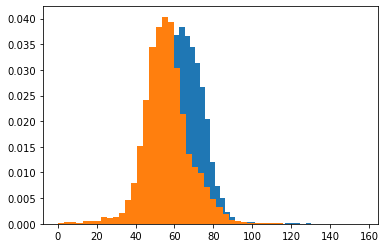

distance_ForepawRight_HindpawLeft


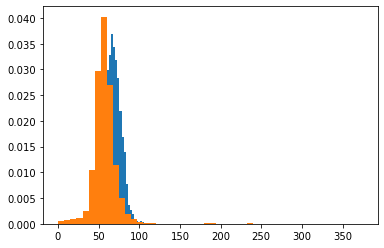

distance_HindpawRight_HindpawLeft


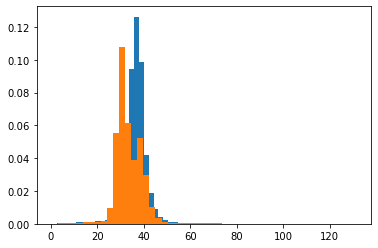

distance_NoseTip_TailBase


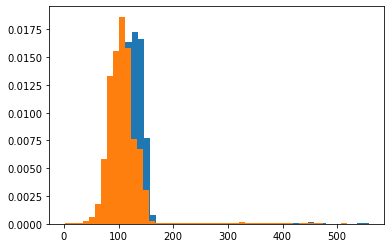

distance_intermediate_feat_average_ForepawLeft_ForepawRight_NoseTip


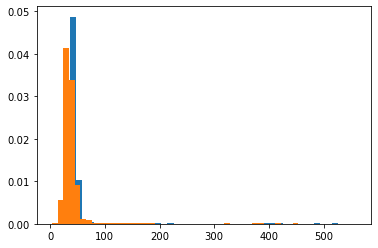

distance_intermediate_feat_average_HindpawLeft_HindpawRight_NoseTip


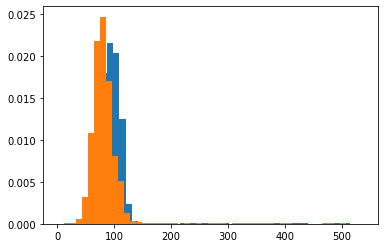

shifted_distance_NoseTip


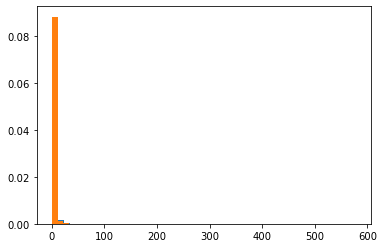

shifted_distance_ForepawLeft


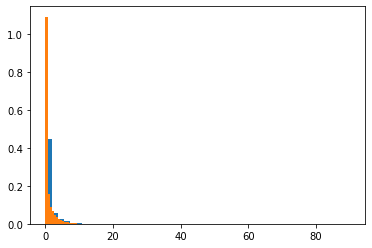

shifted_distance_ForepawRight


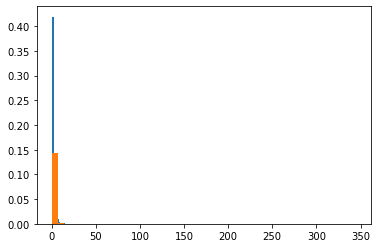

shifted_distance_HindpawLeft


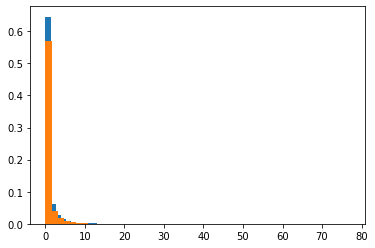

shifted_distance_HindpawRight


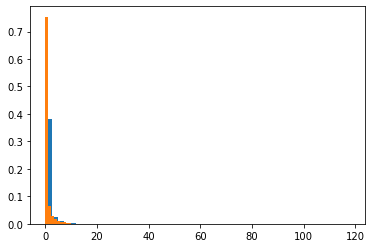

shifted_distance_TailBase


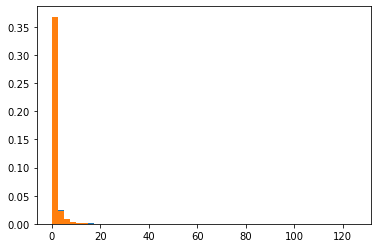

convex_hull_area_ForepawLeft_ForepawRight_HindpawRight_NoseTip_HindpawLeft_TailBase


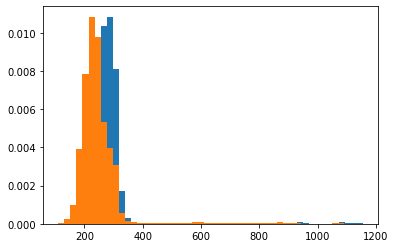

shifted_distance_intermediate_feat_convex_hull_area_ForepawLeft_ForepawRight_HindpawRight_NoseTip_HindpawLeft_TailBase


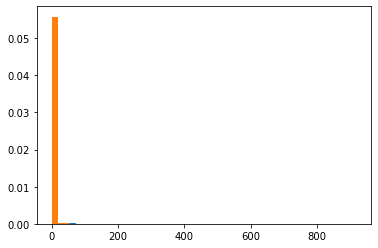

In [46]:
feats = ['distance_ForepawLeft_ForepawRight',
 'distance_ForepawLeft_NoseTip',
 'distance_ForepawRight_NoseTip',
 'distance_ForepawRight_HindpawRight',
 'distance_ForepawLeft_HindpawLeft',
 'distance_ForepawLeft_HindpawRight',
 'distance_ForepawRight_HindpawLeft',
 'distance_HindpawRight_HindpawLeft',
 'distance_NoseTip_TailBase',
 'distance_intermediate_feat_average_ForepawLeft_ForepawRight_NoseTip',
 'distance_intermediate_feat_average_HindpawLeft_HindpawRight_NoseTip',
 'shifted_distance_NoseTip',
 'shifted_distance_ForepawLeft',
 'shifted_distance_ForepawRight',
 'shifted_distance_HindpawLeft',
 'shifted_distance_HindpawRight',
 'shifted_distance_TailBase',
 'convex_hull_area_ForepawLeft_ForepawRight_HindpawRight_NoseTip_HindpawLeft_TailBase',
 'shifted_distance_intermediate_feat_convex_hull_area_ForepawLeft_ForepawRight_HindpawRight_NoseTip_HindpawLeft_TailBase']

# feats = ['distance_ForepawLeft_ForepawRight',
# 'distance_HindpawRight_HindpawLeft']


for f in feats:
    plt.cla()
    print(f)
    kw = dict(
        density=True,
        bins=50
    )
    plt.hist(con_df[f], **kw)
    plt.hist(thc_df[f], **kw)
    plt.show()

In [47]:
# df_flat should have the ROI's on it now
for s in flat_df.columns:
    print(s)

Unnamed: 0
NoseTip_x
NoseTip_y
NoseTip_likelihood
ForepawLeft_x
ForepawLeft_y
ForepawLeft_likelihood
ForepawRight_x
ForepawRight_y
ForepawRight_likelihood
HindpawLeft_x
HindpawLeft_y
HindpawLeft_likelihood
HindpawRight_x
HindpawRight_y
HindpawRight_likelihood
TailBase_x
TailBase_y
TailBase_likelihood
Center_x
Center_y
Center_likelihood
scorer
data_source
frame
animal
simba_roi
intermediate_feat_average_ForepawLeft_ForepawRight_x
intermediate_feat_average_ForepawLeft_ForepawRight_y
intermediate_feat_average_HindpawLeft_HindpawRight_x
intermediate_feat_average_HindpawLeft_HindpawRight_y
intermediate_feat_convex_hull_area_ForepawLeft_ForepawRight_HindpawRight_NoseTip_HindpawLeft_TailBase
distance_ForepawLeft_ForepawRight
distance_ForepawLeft_NoseTip
distance_ForepawRight_NoseTip
distance_ForepawRight_HindpawRight
distance_ForepawLeft_HindpawLeft
distance_ForepawLeft_HindpawRight
distance_ForepawRight_HindpawLeft
distance_HindpawRight_HindpawLeft
distance_NoseTip_TailBase
distance_intermed

In [53]:
roi_df = flat_df[['frame', 'animal', roi_col, y_col]]
roi_df = roi_df[roi_df.simba_roi.notnull()]

roi_con_df = roi_df.loc[roi_df[y_col] == 'air_control']
roi_thc_df = roi_df.loc[roi_df[y_col] == 'THC_injected']

# TODO: Plot x is frame, y is probability of being in 'exploration' ROI...
#       Might need to do some pre-processing here. Get the 
roi_df.simba_roi.unique()

array(['open_S', 'center', 'closed_E', 'open_N', 'closed_W'], dtype=object)

In [56]:
roi_df.animal.unique()

array(['1B', '3B'], dtype=object)

In [59]:
a = roi_con_df.groupby('frame')
a.